# ライフゲーム（ファイルから個体を読み込む）

・ファイルに書かれた個体を読み込む<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#### 初期設定

フィールドの大きさと初期状態でセルを黒にする確率

In [2]:
ROWS = 5
COLS = 10
p=0.3

#### ライフゲームのクラス

・initメソッド：ファイルを読み込んでいる（フィールドの大きさはファイル名を参考に変更する必要がある）<br>
・checkメソッド：周囲の生存セルを数える<br>
・evolutionメソッド：周囲の状態から次の状態を決める

In [3]:
class LifeGame():
    def __init__(self):
#        self.field = np.random.choice([0,1],[ROWS,COLS],p=[1-p,p])
        self.field = np.zeros([ROWS,COLS], dtype=int)
        f = np.loadtxt('HannyFarmB_5x10_6.txt', delimiter='\t', dtype=np.int64)
        for row in range(ROWS):
            for col in range(COLS):
              self.field[ROWS-row-1][col] = f[row][col]  
    def check(self, y, x):
        # 周囲の生存セルを数える
        cnt = 0
        tbl = [(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0)]
        for t in tbl:
            xx, yy = [x + t[0], y + t[1]]
            if xx==COLS:xx=0
            if yy==ROWS:yy=0
            if self.field[yy][xx]: cnt += 1
        return cnt
    def evolution(self, t=-1):
        if t == 0:return self.field
        next_field = np.zeros([ROWS,COLS], dtype=int)
        for y in range(ROWS):
            for x in range(COLS):
                n = self.check(y,x)
                s = self.field[y,x]
                if s==0:
                    if n==3:
                        next_field[y,x] = 1
                    else:
                        next_field[y,x] = 0
                else:
                    if n<=1 or n>=4:
                        next_field[y,x] = 0
                    else:
                        next_field[y,x] = 1
        self.field = next_field
        return self.field

#### ライフゲームの実行

・表示の設定<br>
・シミュレーションの実行（for文）<br>
・アニメーションの表示

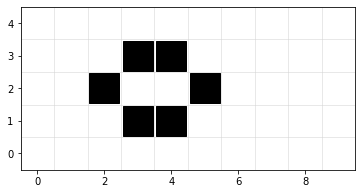

In [4]:
np.random.seed( 0 )
L = LifeGame()

figsize =  (6,6*ROWS/COLS) if ROWS<COLS else (6*COLS/ROWS,6)
makersize = 300/COLS if ROWS<COLS else 300/ROWS
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_xlim(-0.5,COLS-0.5)
ax.set_ylim(-0.5,ROWS-0.5)
for i in range(COLS+1):
    ax.plot((i-0.5,i-0.5),(-0.5,ROWS-0.5),color='lightgrey', linewidth=0.5)
for i in range(ROWS+1):
    ax.plot((-0.5,COLS-0.5),(i-0.5,i-0.5),color='lightgrey', linewidth=0.5)
ims = []

for t in range(6):
    field_data = L.evolution(t)
    plot_data = np.array(np.where(field_data == 1))
    im=ax.plot(plot_data[1],plot_data[0],marker="s",linestyle="none", ms=makersize,c="k")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=200, repeat=False)
HTML(ani.to_jshtml())

#ani.save("LifeGame.gif")#,writer="imagemagick")